In [1]:
print("Hello")

Hello


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits


In [ ]:
data = load_digits()
X = data.data
y = data.target


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42
)

In [24]:
def get_random_forest(n):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average="weighted")
    recall = recall_score(y_test, y_pred,average="weighted")
    F1_score = f1_score(y_test, y_pred,average="weighted")
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, F1_score, cm




No. of Trees:1
Accuracy: 0.8166666666666667, Precision: 0.8187117298695832, Recall: 0.8166666666666667, F1-Score: 0.8150573981919379


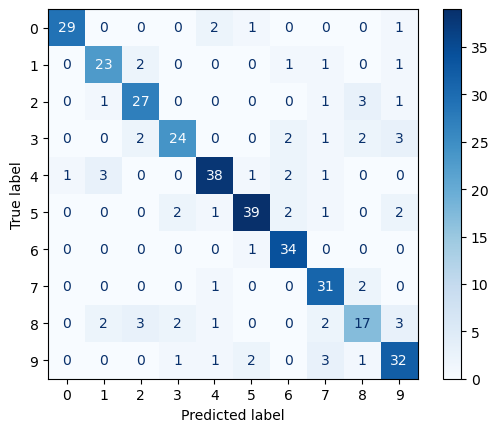

----------------------------------------------------------------------------
No. of Trees:5
Accuracy: 0.9333333333333333, Precision: 0.9360334201020475, Recall: 0.9333333333333333, F1-Score: 0.9334210124772557


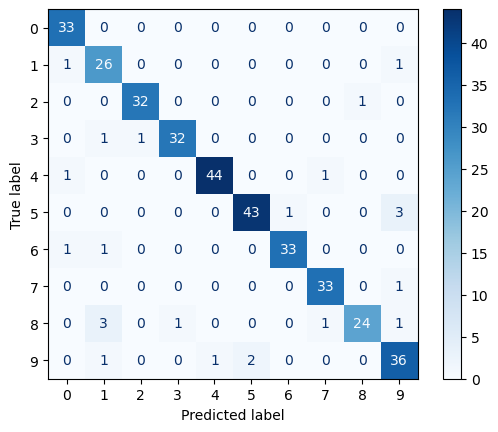

----------------------------------------------------------------------------
No. of Trees:10
Accuracy: 0.9583333333333334, Precision: 0.9589342125739184, Recall: 0.9583333333333334, F1-Score: 0.9582689456468573


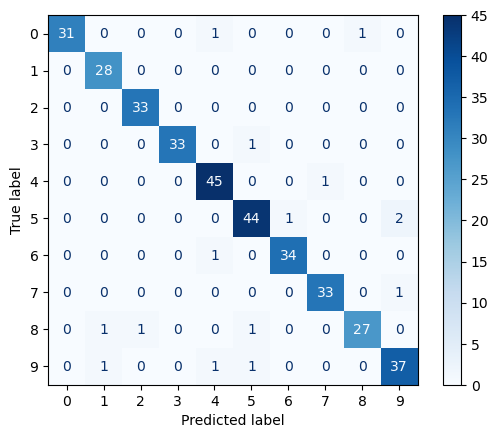

----------------------------------------------------------------------------
No. of Trees:15
Accuracy: 0.9638888888888889, Precision: 0.964159589479353, Recall: 0.9638888888888889, F1-Score: 0.9639085792361958


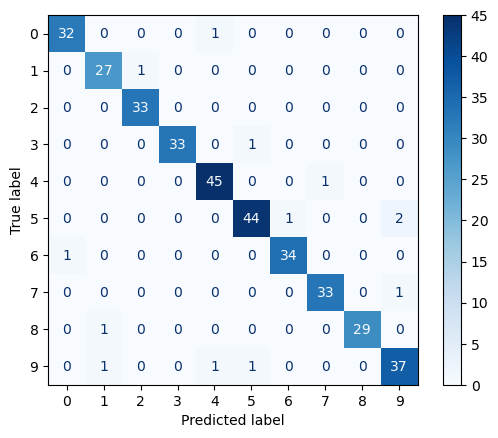

----------------------------------------------------------------------------
No. of Trees:20
Accuracy: 0.9638888888888889, Precision: 0.9644015516987322, Recall: 0.9638888888888889, F1-Score: 0.9639240750368868


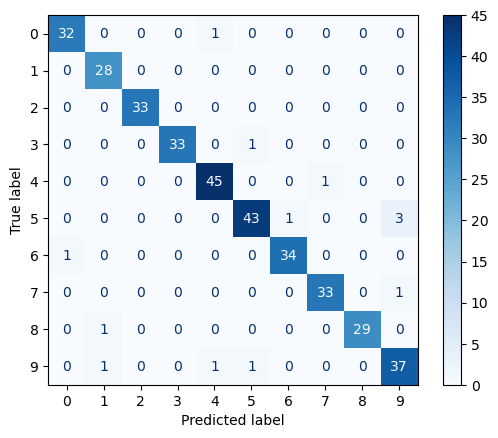

----------------------------------------------------------------------------


In [27]:
trees = [1,5,10,15,20]
result = {"accuracy":[],
          "precision":[],
          "recall":[],
          "F1-score":[],
          "confusion_matrix": []
          }
for i in trees:
    a,p,r,f,cm = get_random_forest(i)
    result["accuracy"].append(a)
    result["precision"].append(p)
    result["recall"].append(r)
    result["F1-score"].append(f)
    result["confusion_matrix"].append(cm)
    print(f"No. of Trees:{i}")
    print("Accuracy: {}, Precision: {}, Recall: {}, F1-Score: {}".format(a,p,r,f))
    cm = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm.plot(cmap="Blues")
    plt.show()
    print("----------------------------------------------------------------------------")

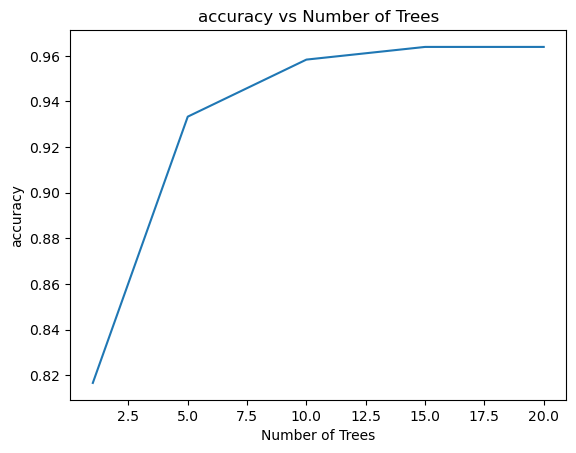

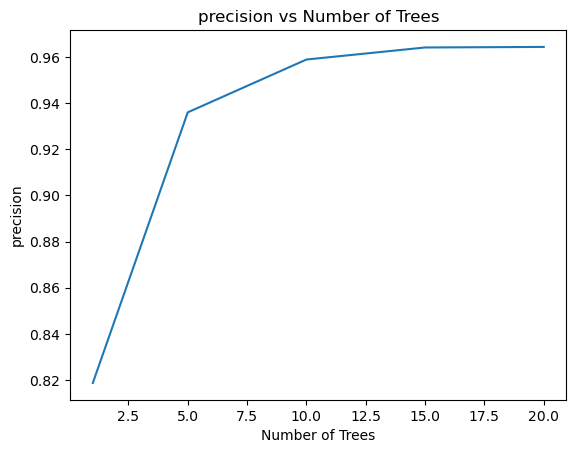

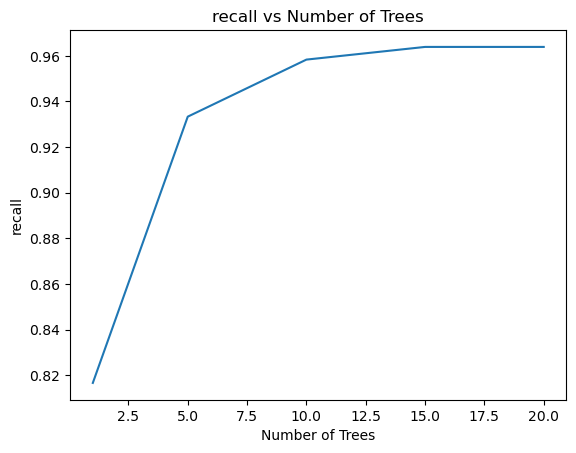

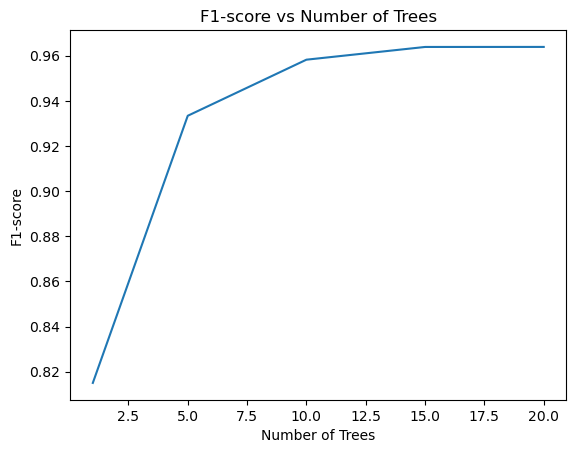

In [22]:
for item in result:
    plt.plot(trees, result[item])
    plt.title(item+" vs Number of Trees",)
    plt.xlabel("Number of Trees")
    plt.ylabel(item)
    plt.show()